In [5]:
import pandas as pd

sales_df = pd.read_csv(r"D:\vi\developer_arena\week5\sales_data.csv")
customers_df = pd.read_csv(r"D:\vi\developer_arena\week5\customer_churn.csv")

sales_df.head(), customers_df.head()


(         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
 0  2024-01-01       Phone         7  37300     CUST001   East       261100
 1  2024-01-02  Headphones         4  15406     CUST002  North        61624
 2  2024-01-03       Phone         2  21746     CUST003   West        43492
 3  2024-01-04  Headphones         1  30895     CUST004   East        30895
 4  2024-01-05      Laptop         8  39835     CUST005  North       318680,
   CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
 0     C00001       6              64          1540        One year   
 1     C00002      21             113          1753  Month-to-month   
 2     C00003      27              31          1455        Two year   
 3     C00004      53              29          7150  Month-to-month   
 4     C00005      16             185          1023        One year   
 
       PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
 0       Credit Card               No              1 

In [6]:
# Dataset structure
sales_df.info()
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   P

In [7]:
# Check missing values
sales_df.isnull().sum()
customers_df.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharges      0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
SeniorCitizen       0
Churn               0
dtype: int64

In [8]:
# Convert Date column
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')

# Remove rows with invalid dates
sales_df.dropna(subset=['Date'], inplace=True)

# Ensure numeric columns
sales_df['Quantity'] = pd.to_numeric(sales_df['Quantity'], errors='coerce')
sales_df['Price'] = pd.to_numeric(sales_df['Price'], errors='coerce')
sales_df['Total_Sales'] = pd.to_numeric(sales_df['Total_Sales'], errors='coerce')

# Fill missing numeric values
sales_df.fillna(0, inplace=True)

# Extract date parts
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month


In [9]:
# Convert TotalCharges to numeric
customers_df['TotalCharges'] = pd.to_numeric(customers_df['TotalCharges'], errors='coerce')

# Fill missing values
customers_df['TotalCharges'].fillna(customers_df['TotalCharges'].median(), inplace=True)

# Create churn flag
customers_df['ChurnFlag'] = customers_df['Churn'].map({'Yes': 1, 'No': 0})


In [10]:
customers_df.rename(columns={'CustomerID': 'Customer_ID'}, inplace=True)

In [11]:
merged_df = pd.merge(
    sales_df,
    customers_df,
    on='Customer_ID',
    how='left'
)

merged_df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Year,Month,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn,ChurnFlag
0,2024-01-01,Phone,7,37300,CUST001,East,261100,2024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-03,Phone,2,21746,CUST003,West,43492,2024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,2024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,2024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
total_revenue = merged_df['Total_Sales'].sum() 

In [13]:
print(total_revenue)

12365048


In [14]:
revenue_by_region = merged_df.groupby('Region')['Total_Sales'].sum()
revenue_by_region

Region
East     2519639
North    3983635
South    3737852
West     2123922
Name: Total_Sales, dtype: int64

In [38]:
revenue_by_contract = merged_df.groupby('Contract')['Total_Sales'].sum()
revenue_by_contract

Series([], Name: Total_Sales, dtype: int64)

In [17]:
top_customers = (
    merged_df.groupby('Customer_ID')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers


Customer_ID
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
CUST084    324144
CUST070    318762
CUST005    318680
CUST065    312564
CUST028    304465
Name: Total_Sales, dtype: int64

In [18]:
orders_per_customer = merged_df.groupby('Customer_ID')['Date'].nunique()
retention_rate = (orders_per_customer > 1).mean() * 100
retention_rate

np.float64(0.0)

In [19]:
monthly_sales = (
    merged_df.groupby(['Year', 'Month'])['Total_Sales']
    .sum()
    .reset_index()
)
monthly_sales


,Year,Month,Total_Sales
0,2024,1,4120524
1,2024,2,2656050
2,2024,3,4485006
3,2024,4,1103468


In [20]:
top_products = (
    merged_df.groupby('Product')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products


Product
Laptop        136
Tablet        127
Phone         101
Monitor        66
Headphones     48
Name: Quantity, dtype: int64

In [21]:
pivot_sales = pd.pivot_table(
    merged_df,
    values='Total_Sales',
    index='Region',
    columns='Product',
    aggfunc='sum'
)
pivot_sales


Product,Headphones,Laptop,Monitor,Phone,Tablet
Region,,,,,
East,288361,221946,642870,506828,859634
North,107091,1798206,397100,489284,1191954
South,512168,1373120,39924,1471428,341212
West,476413,495938,268177,391854,491540


In [22]:
pivot_churn = pd.pivot_table(
    merged_df,
    values='ChurnFlag',
    index='Contract',
    columns='Region',
    aggfunc='mean'
)
pivot_churn


Region
Contract


In [23]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

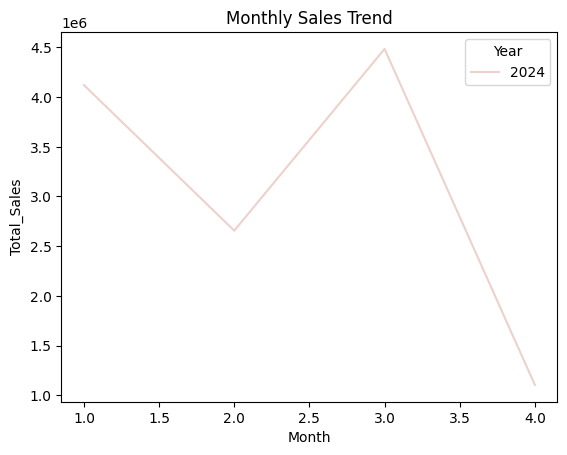

In [25]:
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', hue='Year')
plt.title("Monthly Sales Trend")
plt.show()

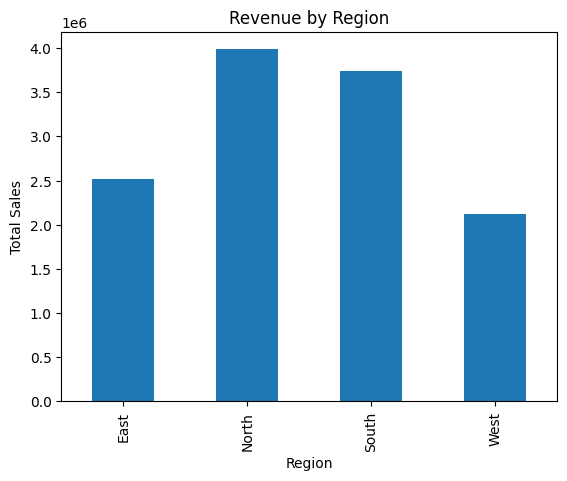

In [26]:
revenue_by_region.plot(kind='bar', title="Revenue by Region")
plt.ylabel("Total Sales")
plt.show()


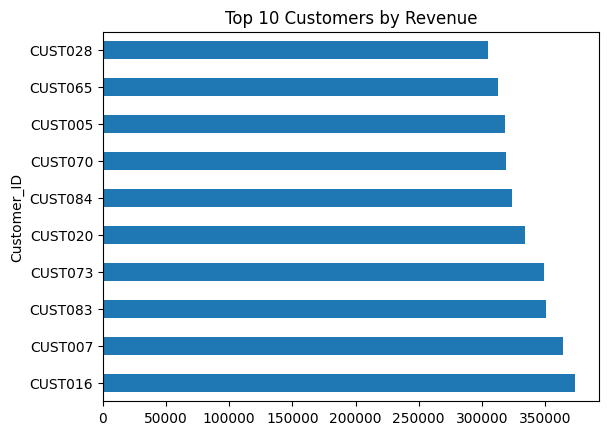

In [27]:
top_customers.plot(kind='barh', title="Top 10 Customers by Revenue")
plt.show()


In [32]:
churn_by_contract = merged_df.groupby('Contract')['ChurnFlag'].mean().reset_index()
churn_by_contract


,Contract,ChurnFlag


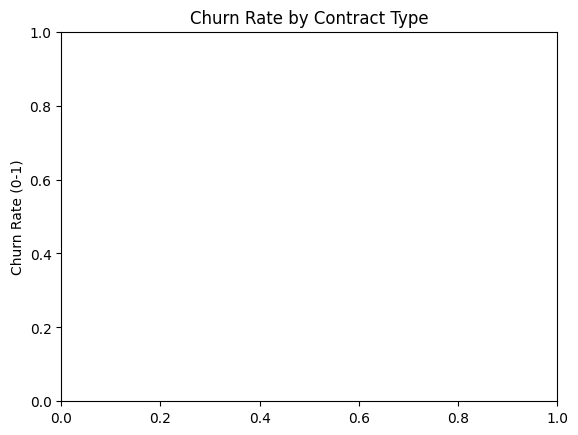

In [33]:
sns.barplot(data=churn_by_contract, x='Contract', y='ChurnFlag', palette="Set2")
plt.ylabel("Churn Rate (0-1)")
plt.title("Churn Rate by Contract Type")
plt.ylim(0, 1)  # ensures full y-axis scale
plt.show()


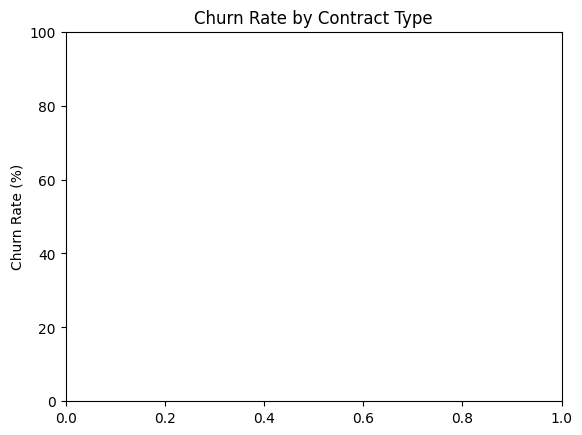

In [34]:
churn_by_contract['ChurnPercent'] = churn_by_contract['ChurnFlag'] * 100

sns.barplot(data=churn_by_contract, x='Contract', y='ChurnPercent', palette="Set2")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Contract Type")
plt.ylim(0, 100)
plt.show()


C:\Users\INDIA\AppData\Local\Temp\ipykernel_11140\971127272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_revenue, y='Product', x='Total_Sales', palette="viridis")


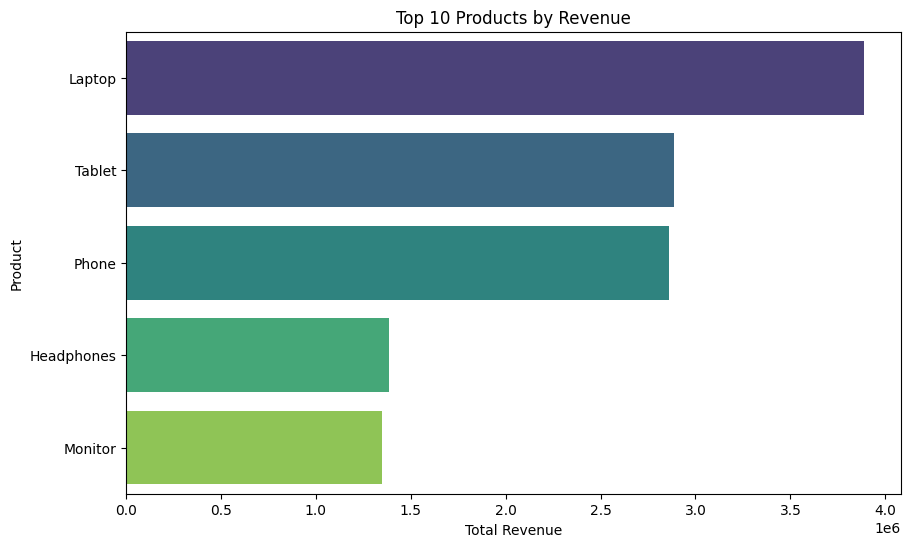

In [35]:
# Aggregate total sales per product
top_products_revenue = merged_df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_products_revenue, y='Product', x='Total_Sales', palette="viridis")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.title("Top 10 Products by Revenue")
plt.show()


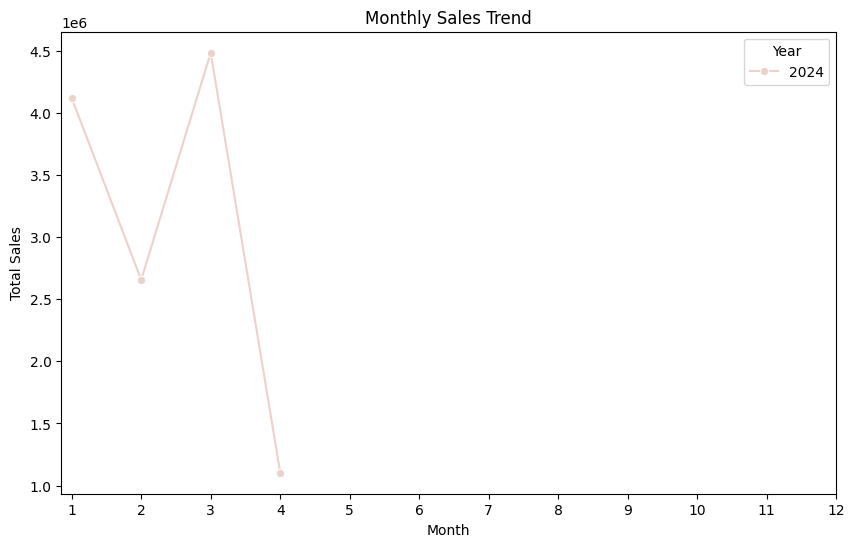

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', hue='Year', marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.show()
